In [1]:
import scanpy as sc
import drug2cell as d2c
import pandas as pd

In [32]:
adata = sc.read_h5ad("/Users/mennayoussef/Downloads/Galaxy20-[Clustered_and_Annotated_Adult_NCMs].h5ad")

In [33]:
adata.obs.columns

Index(['Region', 'Sex', 'Age', 'Age_Range', 'Cell_or_Nuclei', 'Disease',
       'Study', 'Study_Batch', 'Study_Type', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'total_counts_Mito', 'log1p_total_counts_Mito', 'pct_counts_Mito',
       'stressScore', 'Indiv', 'n_genes', 'n_counts', 'Donor', 'batch',
       'batch2', 'General_Region', 'Foetal Cluster', 'Adult Cluster',
       'Cluster', 'Foetal Cell Type', 'Cell Type i', 'Cell Type ii',
       'Cell Type', 'NCM Cell Type'],
      dtype='object')

In [23]:
# Subset .obs (cells)
subset_adata = adata[(adata.obs["General_Region"] == "Atrial") & 
                      (adata.obs["NCM Cell Type"] == "Macrophages")].copy()


In [24]:
# Subset .var (genes) to keep only those expressed in at least one of the selected cells
subset_adata = subset_adata[:, subset_adata.X.sum(axis=0) > 0].copy()

In [25]:
subset_adata.var

,gene_symbols-2,Mito-2,Mito-3,gene_symbols-4,Mito-4,gene_symbols-5,Mito-5,gene_symbols-6,Mito-6,n_cells,...,log1p_mean_counts-6-1,pct_dropout_by_counts-6-1,total_counts-6-1,log1p_total_counts-6-1,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
ENSG00000000003,ENSG00000000003,False,False,TSPAN6,False,TSPAN6,False,TSPAN6,False,18440,...,1.891628,55.679062,27858.0,10.234911,False,0.102406,2.193463,0.493447,0,False
ENSG00000000005,ENSG00000000005,False,False,TNMD,False,nan,nan,TNMD,False,733,...,0.142360,98.039612,757.0,6.630683,False,0.002768,1.886384,0.351126,1,False
ENSG00000000419,ENSG00000000419,False,False,DPM1,False,DPM1,False,DPM1,False,128811,...,2.184024,41.248989,39000.0,10.571342,False,0.356670,2.160561,-0.291449,0,False
ENSG00000000457,ENSG00000000457,False,False,SCYL3,False,SCYL3,False,SCYL3,False,53227,...,0.500261,90.864996,3212.0,8.074961,False,0.112064,2.215177,0.468291,0,False
ENSG00000000460,ENSG00000000460,False,False,C1orf112,False,C1orf112,False,C1orf112,False,47402,...,0.481208,92.057397,3058.0,8.025844,False,0.093011,2.024132,0.385940,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285448,nan,nan,False,nan,nan,nan,nan,nan,nan,120,...,NaN,NaN,NaN,NaN,False,0.000409,0.692073,-0.330652,0,False
ENSG00000285454,nan,nan,False,nan,nan,nan,nan,nan,nan,4309,...,NaN,NaN,NaN,NaN,False,0.005161,0.806699,-0.068923,0,False
ENSG00000285473,nan,nan,False,nan,nan,nan,nan,nan,nan,755,...,NaN,NaN,NaN,NaN,False,0.000835,0.370068,0.044508,0,False
ENSG00000285486,nan,nan,False,nan,nan,nan,nan,nan,nan,258,...,NaN,NaN,NaN,NaN,False,0.000299,0.750739,-0.180382,0,False


In [27]:
subset_adata.var = subset_adata.var.set_index('gene_symbols-4')

KeyError: "None of ['gene_symbols-4'] are in the columns"

In [28]:
subset_adata

AnnData object with n_obs × n_vars = 16764 × 28335
    obs: 'Region', 'Sex', 'Age', 'Age_Range', 'Cell_or_Nuclei', 'Disease', 'Study', 'Study_Batch', 'Study_Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mito', 'log1p_total_counts_Mito', 'pct_counts_Mito', 'stressScore', 'Indiv', 'n_genes', 'n_counts', 'Donor', 'batch', 'batch2', 'General_Region', 'Foetal Cluster', 'Adult Cluster', 'Cluster', 'Foetal Cell Type', 'Cell Type i', 'Cell Type ii', 'Cell Type', 'NCM Cell Type'
    var: 'gene_symbols-2', 'Mito-2', 'Mito-3', 'Mito-4', 'gene_symbols-5', 'Mito-5', 'gene_symbols-6', 'Mito-6', 'n_cells', 'Mito', 'gene_symbols', 'Mito-0', 'gene_symbols-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'log1p_mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'log1p_total_counts-0-0', 'n_cells-0-0', 'n_c

In [31]:
subset_adata.write("/Users/mennayoussef/Downloads/macrophage_subset.h5ad")

In [30]:
print(type(subset_adata))

<class 'anndata._core.anndata.AnnData'>


In [40]:
d2c.score(subset_adata, use_raw=True)

In [41]:
subset_adata.uns["drug2cell"]

AnnData object with n_obs × n_vars = 16764 × 2311
    obs: 'Region', 'Sex', 'Age', 'Age_Range', 'Cell_or_Nuclei', 'Disease', 'Study', 'Study_Batch', 'Study_Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mito', 'log1p_total_counts_Mito', 'pct_counts_Mito', 'stressScore', 'Indiv', 'n_genes', 'n_counts', 'Donor', 'batch', 'batch2', 'General_Region', 'Foetal Cluster', 'Adult Cluster', 'Cluster', 'Foetal Cell Type', 'Cell Type i', 'Cell Type ii', 'Cell Type', 'NCM Cell Type'
    var: 'genes', 'all_genes'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

In [42]:
subset_adata.uns["drug2cell"].var

,genes,all_genes
CHEMBL1615779|IOBENGUANE I 131,SLC6A2,SLC6A2
CHEMBL3989924|LUTETIUM DOTATATE LU-177,"SSTR1,SSTR5,SSTR2","SSTR3,SSTR2,SSTR1,SSTR5,SSTR4"
CHEMBL2108709|COLLAGENASE CLOSTRIDIUM HISTOLYTICUM,"COL11A1,COL5A3,COL4A4,COL1A1,COL5A1,COL4A2,COL...","COL1A1,COL5A3,COL4A3,COL6A5,COL6A1,COL15A1,COL..."
CHEMBL256997|ATALUREN,"RPS20,RPL18,RPL31,RPS5,RPL6,RPLP0,RPL3,RPS16,R...","RPS24,RPS11,RPS17,RPS14,RPL9P8,RPL18A,RPS27A,R..."
CHEMBL1201556|BECAPLERMIN,"PDGFRB,PDGFRA","PDGFRB,PDGFRA"
...,...,...
CHEMBL2068724|ACAMPROSATE CALCIUM,"GABRA3,GABRA1,GABRP,GABRE,GRIN2D,GABRA4,GABRG2...","GABRB2,GABRA1,GABRB1,GRIN2C,GRIN2D,GRIN2A,GABR..."
CHEMBL1562610|MECLOFENAMATE SODIUM,"PTGS2,PTGS1,GMNN,CYP2C9","ALOX5,GMNN,PTGS1,CYP2C9,PTGS2"
CHEMBL1200467|HYDROXYZINE PAMOATE,"KDM4A,HSD17B10,POLI,POLK,PLK1,FEN1,POLH,HRH1","POLI,EHMT2,FEN1,HRH1,HSD17B10,KDM4A,PLK1,POLH,..."
CHEMBL454|BUTALBITAL,"GABRA3,GABRA1,GABRP,GABRE,GABRA4,GABRG2,GABRA6...","GABRE,GABRG3,GABRB2,GABRG2,GABRB1,GABRA3,GABRA..."


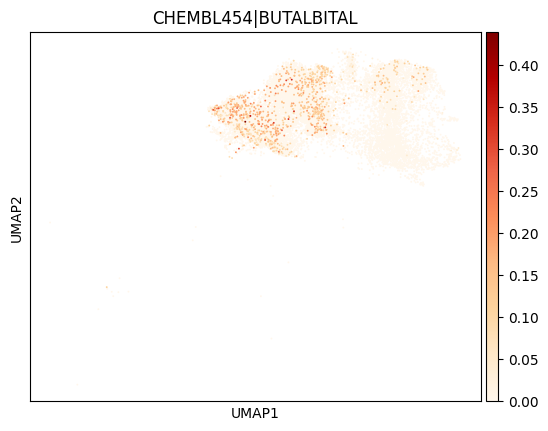

In [45]:
sc.pl.umap(subset_adata.uns['drug2cell'], color="CHEMBL454|BUTALBITAL", color_map="OrRd")